# Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Base de dados
Fonte (adaptado): https://www.kaggle.com/laotse/credit-risk-dataset

# Exploração dos dados

In [ ]:
base_credit = pd.read_csv('dataset/credit_data.csv')

In [ ]:
base_credit
# defaulted
# 0 pagou
# 1 nao pagou

In [ ]:
base_credit.head(10)

In [ ]:
base_credit.tail(10)

In [ ]:
base_credit.describe()

In [ ]:
base_credit[base_credit['income'] >= 69995.685578 ]

In [ ]:
base_credit[base_credit['loan'] <= 1.377630	]

# Visualização dos dados

In [ ]:
# dados únicos default
np.unique(base_credit['default'], return_counts=True)

In [ ]:
sns.countplot(x = base_credit['default'])

In [ ]:
plt.hist(x = base_credit['age']);

In [ ]:
plt.hist(x = base_credit['income']);

In [ ]:
plt.hist(x = base_credit['loan']);

In [ ]:
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color = 'default')
grafico.show()

# Tratamento de valores inconsistentes

In [ ]:
base_credit.loc[base_credit['age'] < 0]

In [ ]:
base_credit[base_credit['age'] < 0]

In [ ]:
# apagar a coluna inteira 
base_credit2 = base_credit.drop('age', axis=1)
base_credit2

In [ ]:
# apagar somente os registros com valores inconsistentes
base_credit3 = base_credit.drop(base_credit[base_credit['age'] < 0].index)
base_credit3

In [ ]:
base_credit3.index

In [ ]:
base_credit3.loc[base_credit3['age'] < 0]

In [ ]:
base_credit3.describe()

In [ ]:
# preencher os valores inconsistentes manualmente
# preencher os valores inconsistentes com a média
base_credit.mean()

In [ ]:
base_credit['age'].mean()

In [ ]:
base_credit['age'][base_credit['age'] > 0].mean()

In [ ]:
# base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92

base_credit.loc[base_credit['age'] < 0, 'age'] = base_credit['age'][base_credit['age'] > 0].mean()

In [ ]:
base_credit.loc[base_credit['age'] < 0]

In [ ]:
base_credit.head(27)

In [ ]:
base_credit.describe()

# Tratamentos de valores faltantes

In [ ]:
base_credit.isnull()

In [ ]:
base_credit.isnull().sum()

In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]

In [ ]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace=True)

In [ ]:
base_credit.loc[base_credit['clientid'].isin([29, 31, 32])]

In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]

In [ ]:
base_credit.isnull().sum()

# Divisão entre previsores e classe

In [ ]:
# colunas income, age e loan
#previsores
x_credit = base_credit.iloc[:, 1:4].values
x_credit

In [ ]:
type(x_credit)

In [ ]:
# somente coluna default
# classe 
y_credit = base_credit.iloc[:, 4].values
y_credit

# Escalonamento dos valores

In [ ]:
x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:,2].min()

In [ ]:
x_credit[:,0].max(), x_credit[:,1].max(), x_credit[:,2].max()

In [ ]:
# padronização dos dados
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)

In [ ]:
x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:,2].min()

In [ ]:
x_credit[:,0].max(), x_credit[:,1].max(), x_credit[:,2].max()

# Base de dados do censo
fonte: https://archive.ics.uci.edu/ml/datasets/adult

## Exploração dos dados

In [ ]:
base_census = pd.read_csv('dataset/census.csv')

In [ ]:
base_census

In [ ]:
base_census.describe()

In [ ]:
base_census.isnull().sum()

## Visualização de dados

In [ ]:
np.unique(base_census['income'], return_counts=True)

In [ ]:
sns.countplot(x = base_census['income'])

In [ ]:
plt.hist(x = base_census['age'])

In [ ]:
plt.hist(x = base_census['education-num'])

In [ ]:
plt.hist(x = base_census['hour-per-week'])

In [ ]:
grafico = px.treemap(base_census, path=['workclass', 'age'])
grafico.show()

In [ ]:
grafico = px.treemap(base_census, path=['occupation', 'relationship', 'age'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_census, dimensions=['occupation', 'relationship'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_census, dimensions=['workclass', 'occupation', 'income'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_census, dimensions=['education', 'income'])
grafico.show()

## Divisão entre previsores e classe

In [ ]:
x_census = base_census.iloc[:, 0:14].values
x_census

In [ ]:
y_census = base_census.iloc[:, 14].values
y_census

## Tratamento de atributos categóricos
#### conversão de atributos strings para numéricos para realização de cálculos necessários

### Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder_teste = LabelEncoder()

In [ ]:
x_census[:,1]

In [ ]:
teste = label_encoder_teste.fit_transform(x_census[:,1])
teste

In [ ]:
x_census[0]

In [ ]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [ ]:
x_census[:,1] = label_encoder_workclass.fit_transform(x_census[:,1])
x_census[:,3] = label_encoder_education.fit_transform(x_census[:,3])
x_census[:,5] = label_encoder_marital.fit_transform(x_census[:,5])
x_census[:,6] = label_encoder_occupation.fit_transform(x_census[:,6])
x_census[:,7] = label_encoder_relationship.fit_transform(x_census[:,7])
x_census[:,8] = label_encoder_race.fit_transform(x_census[:,8])
x_census[:,9] = label_encoder_sex.fit_transform(x_census[:,9])
x_census[:,13] = label_encoder_country.fit_transform(x_census[:,13])

In [ ]:
x_census[0]

In [ ]:
x_census

### OneHotEncoder

In [ ]:
# Carro

# Gol Pálio Uno
#   1     2   3 #label

# Gol   1 0 0
# Pálio 0 1 0
# Uno   0 0 1 #onehotencode

In [ ]:
len(np.unique(base_census['workclass'])) # 1 0 0 0 0 0 0 0, 0 0 0 0 1 0 0 0 0

In [ ]:
len(np.unique(base_census['occupation']))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [ ]:
x_census = onehotencoder_census.fit_transform(x_census).toarray()
x_census

In [ ]:
x_census[0]

In [ ]:
x_census.shape

### Escalonamento dos valores

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
x_census = scaler_census.fit_transform(x_census)

In [ ]:
x_census[0]

# Divisão das bases treinamento e testes

In [ ]:
from sklearn.model_selection import train_test_split

## Base crédito

In [ ]:
x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x_credit, y_credit, test_size = 0.25, random_state = 0)

In [ ]:
x_credit_treinamento.shape

In [ ]:
y_credit_treinamento.shape

In [ ]:
x_credit_teste.shape, y_credit_teste.shape

## Base Census

In [ ]:
x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste = train_test_split(x_census, y_census, test_size = 0.15, random_state = 0)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape

In [ ]:
x_census_teste.shape, y_census_teste.shape

## Salvar as variáveis

In [ ]:
import pickle

In [ ]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste], f)

In [ ]:
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste], f)

****

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

## Base risco de crédito

In [ ]:
base_risco_credito = pd.read_csv('dataset/risco_credito.csv')

In [ ]:
base_risco_credito

In [ ]:
base_risco_credito.shape

In [ ]:
x_risco_credito = base_risco_credito.iloc[:, 0:4].values
x_risco_credito

In [ ]:
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [ ]:
x_risco_credito[:, 0] = label_encoder_historia.fit_transform(x_risco_credito[:, 0])
x_risco_credito[:, 1] = label_encoder_divida.fit_transform(x_risco_credito[:, 1])
x_risco_credito[:, 2] = label_encoder_garantia.fit_transform(x_risco_credito[:, 2])
x_risco_credito[:, 3] = label_encoder_renda.fit_transform(x_risco_credito[:, 3])

In [ ]:
x_risco_credito

In [ ]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([x_risco_credito, y_risco_credito], f)

In [ ]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(x_risco_credito, y_risco_credito)

In [ ]:
# história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2)
# história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)
previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]])

In [ ]:
previsao

In [ ]:
naive_risco_credito.classes_

In [ ]:
naive_risco_credito.class_count_

In [ ]:
naive_risco_credito.class_prior_

## Base credit data

In [ ]:
with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape

In [ ]:
x_credit_teste.shape, y_credit_teste.shape

In [ ]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(x_credit_treinamento, y_credit_treinamento)

In [ ]:
previsoes = naive_credit_data.predict(x_credit_teste)

In [ ]:
previsoes

In [ ]:
y_credit_teste

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_credit_teste, previsoes)

In [ ]:
confusion_matrix(y_credit_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

In [ ]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

## Base Census

In [ ]:
with open('census.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape

In [ ]:
x_census_teste.shape, y_census_teste.shape

In [ ]:
naive_census = GaussianNB()
naive_census.fit(x_census_treinamento, y_census_treinamento)
previsoes = naive_census.predict(x_census_teste)
previsoes

In [ ]:
y_census_teste

In [ ]:
accuracy_score(y_census_teste, previsoes) # não executar o escalonamento, irá chegar perto de 70#

In [ ]:
cm = ConfusionMatrix(naive_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

****

# Árvores de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

## Base risco crédito

In [ ]:
with open('risco_credito.pkl', 'rb') as f:
    x_risco_credito, y_risco_credito = pickle.load(f)

In [ ]:
x_risco_credito, y_risco_credito

In [ ]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(x_risco_credito, y_risco_credito)

In [ ]:
arvore_risco_credito.feature_importances_

In [ ]:
from sklearn import tree
previsores = ['historia de credito', 'divida', 'garantia', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names=arvore_risco_credito.classes_, filled=True);

In [ ]:
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

## Base credit data

In [ ]:
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape

In [ ]:
x_credit_teste.shape, y_credit_teste.shape

In [ ]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arvore_credit.fit(x_credit_treinamento, y_credit_treinamento)

In [ ]:
previsoes = arvore_credit.predict(x_credit_teste)
previsoes

In [ ]:
y_credit_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_credit_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

In [ ]:
arvore_credit.classes_

In [ ]:
from sklearn import tree
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names=['0','1'], filled=True);
fig.savefig('arvore_credit.png')

## Base census

In [ ]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape

In [ ]:
x_census_teste.shape, y_census_teste.shape

In [ ]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(x_census_treinamento, y_census_treinamento)

In [ ]:
previsoes = arvore_census.predict(x_census_teste)
previsoes

In [ ]:
y_census_teste

In [ ]:
accuracy_score(y_census_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
 print(classification_report(y_census_teste, previsoes))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### Base credit data

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
random_forest_credit.fit(x_credit_treinamento, y_credit_treinamento)

In [ ]:
previsoes = random_forest_credit.predict(x_credit_teste)
previsoes

In [ ]:
y_credit_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

### Base census

In [ ]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
random_forest_census.fit(x_census_treinamento, y_census_treinamento)

In [ ]:
previsoes = random_forest_census.predict(x_census_teste)
previsoes

In [ ]:
y_census_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

****

# Regras

In [ ]:
import Orange

## Base risco de crédito

In [ ]:
base_risco_credito = Orange.data.Table('dataset/risco_credito_regras.csv')

In [ ]:
base_risco_credito

In [ ]:
base_risco_credito.domain

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_risco_credito = cn2(base_risco_credito)

In [ ]:
for regras in regras_risco_credito.rule_list:
    print(regras)

In [ ]:
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsoes = regras_risco_credito([['boa', 'alta', 'nenhuma', 'acima_35'], ['ruim', 'alta', 'adequada', '0_15']])
previsoes

In [ ]:
base_risco_credito.domain.class_var.values

In [ ]:
for i in previsoes:
    # print(i)
    print(base_risco_credito.domain.class_var.values[i])

## Base credit data

In [ ]:
base_credit = Orange.data.Table('dataset/credit_data_regras.csv')

In [ ]:
base_credit.domain

In [ ]:
## divide entre testes e treinamento
base_dividida = Orange.evaluation.testing.sample(base_credit, n = 0.25)

In [ ]:
base_dividida

In [ ]:
base_dividida[0]

In [ ]:
base_dividida[1]

In [ ]:
len(base_dividida[0]), len(base_dividida[1])

In [ ]:
base_treinamento = base_dividida[1]
base_teste = base_dividida[0]

In [ ]:
len(base_treinamento), len(base_teste)

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_credit = cn2(base_treinamento)

In [ ]:
for regras in regras_credit.rule_list:
    print(regras)

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_treinamento, base_teste, [lambda testdata: regras_credit])

In [ ]:
previsoes

In [ ]:
Orange.evaluation.CA(previsoes)

## Base census - (executado na interface gráfica do Orange)

## Classificador base - Majority Learner
#### Serve para descobrir o percentual mínimo de acerto para levar um algoritmo em consideração. Exemplo: na base census o majority learner retornou 0.75, isso significa que os outros algoritmos(naive bayes, árvore de decisão) da base census devem ter no mínimo 75% de acerto para ser levado em consideração

### Base credit data

In [ ]:
base_credit = Orange.data.Table('dataset/credit_data_regras.csv')

In [ ]:
base_credit.domain

In [ ]:
majority = Orange.classification.MajorityLearner()

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_credit, base_credit, [majority])

In [ ]:
Orange.evaluation.CA(previsoes)

In [ ]:
for registro in base_credit:
    print(registro.get_class())

In [ ]:
from collections import Counter
Counter(str(registro.get_class()) for registro in base_credit)

In [ ]:
1717 / 2000

### Base census

In [204]:
base_census = Orange.data.Table('dataset/census_regras.csv')

In [205]:
base_census.domain

[age, workclass, final-weight, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loos, hour-per-week, native-country | income]

In [208]:
majority = Orange.classification.MajorityLearner()
previsoes = Orange.evaluation.testing.TestOnTestData(base_census, base_census, [majority])
Orange.evaluation.CA(previsoes)

array([0.75919044])

In [209]:
Counter(str(registro.get_class()) for registro in base_census)

Counter({'<=50K': 24720, '>50K': 7841})

In [212]:
24720 / (24720 + 7841)

0.7591904425539756

# Aprendizado baseado em instâncias

## knn

In [4]:
from sklearn.neighbors import KNeighborsClassifier

### Base credit data

In [1]:
import pickle
with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [2]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [3]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [23]:
knn_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_credit.fit(x_credit_treinamento, y_credit_treinamento)

KNeighborsClassifier()

In [24]:
previsoes = knn_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [25]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [29]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes) 
# padronização ajuda o knn, processo que foi feito antes no pré processamento

0.986

0.986

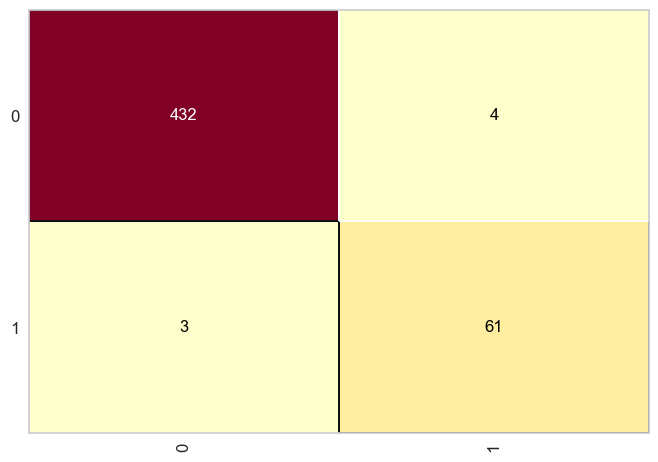

In [27]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [28]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



### Base census

In [30]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [31]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [33]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [40]:
knn_census = KNeighborsClassifier(n_neighbors=5)
knn_census.fit(x_census_treinamento, y_census_treinamento)

KNeighborsClassifier()

In [41]:
previsoes = knn_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [42]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [43]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8223132036847492

0.8290685772773797

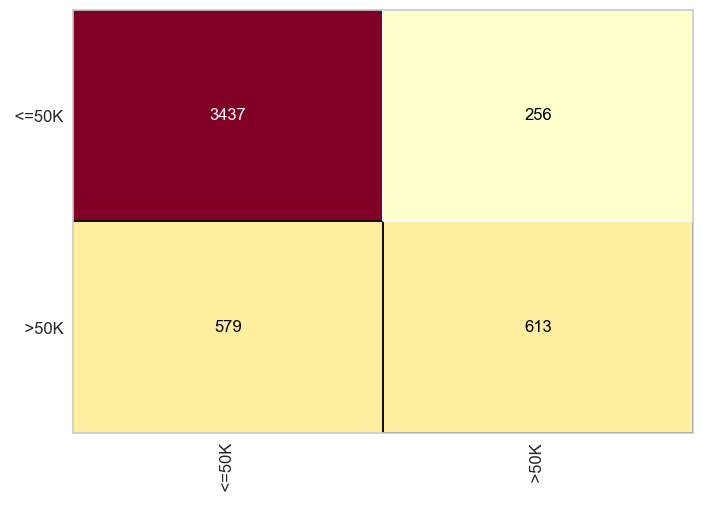

In [38]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [39]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      3693
        >50K       0.71      0.51      0.59      1192

    accuracy                           0.83      4885
   macro avg       0.78      0.72      0.74      4885
weighted avg       0.82      0.83      0.82      4885

